In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [2]:
def generate_binary(n, p, noise_var, threshold):
    """Generate data with binary labels.
    
    Arguments
    ---------
    n (int): number of samples to simulate
    p (int): number of features to simulate
    noise_var (float): variance of Gaussian noise to add, 0 for no noise
    threshold (float): cutoff for 1/0 labels (i.e. approximate proportion
                       of positive labels)
    """
    
    # simulate features from standard normal, and add a linear bias
    X = np.random.randn(n, p)
    
    # coefficients for generating labels log-linearly
    B = np.random.randn(p+1)
    
    # take linear sum
    linsum = B[0] + (X @ B[1:, np.newaxis])
    if noise_var > 0:
        noise = np.random.normal(loc=0., scale=noise_var, size=n)
        linsum += noise
    
    # scale to calculate Bernoulli parameter pi(x_i) for each
    # sample x_i
    pi = 1 / (1 + np.exp(-linsum))
    
    # threshold log-linear sum into binary labels
    y = (pi <= threshold).astype(int)
    
    return X, y, pi

In [3]:
X, y, pi = generate_binary(100, 10, 0, 0.5)
print(X[:5, :])
print(y[:5])
print(pi[:5])

[[ 0.00195594  0.17787027  0.25591785 -1.04709595  1.38942102 -0.63808345
  -0.60644303  0.60771809 -1.00804895 -0.86167874]
 [-1.59405299  1.66635131  0.11034339  0.09374063 -1.2703433   1.04967953
  -0.23970623 -1.05229515 -0.27461844  0.74476895]
 [-0.95186438 -0.32987658 -1.11759012 -0.48868236 -1.61507356  0.63103247
   0.22501958  0.18325001  0.93495321 -0.95467178]
 [-0.22299254 -0.39092877  0.1908286  -0.20177279  0.07337038 -0.30529604
   1.27205471  0.97877684  0.76524002  0.16161287]
 [-0.2665641   0.76012701 -0.32221964 -0.48499408 -0.25042582 -0.5423297
  -1.53964513  1.64055334  0.09288607  0.47920348]]
[[0]
 [0]
 [0]
 [0]
 [0]]
[[0.99543103]
 [0.99881246]
 [0.99759995]
 [0.89498408]
 [0.97890143]]


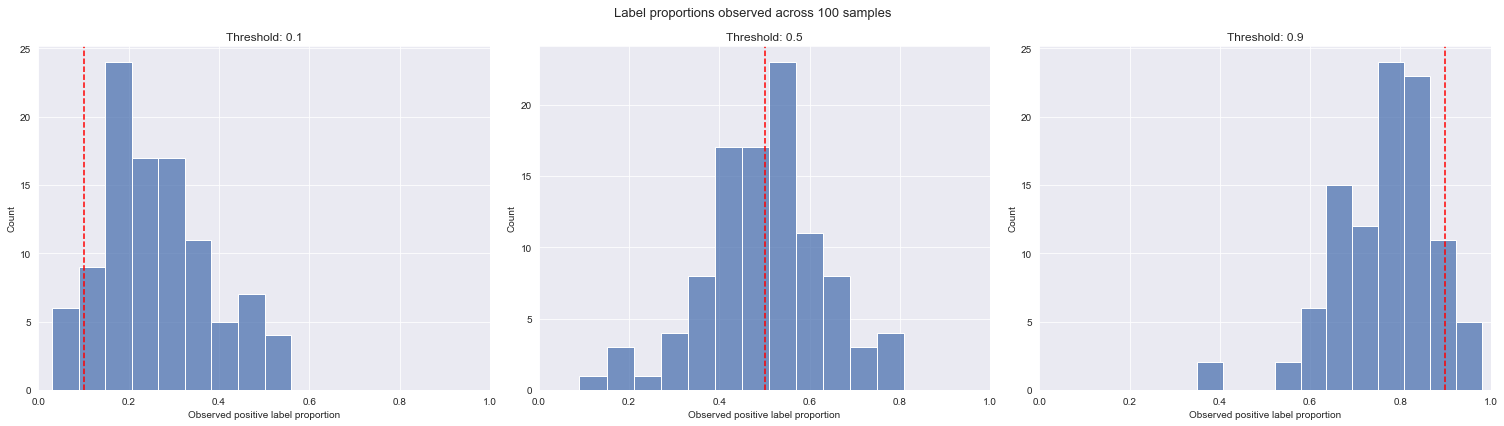

In [4]:
# what (empirical) label proportions do we get when we run the
# simulation many times with a given threshold?
sns.set({'figure.figsize': (21, 6)})
n_samples = 100
        
fig, axarr = plt.subplots(1, 3)

for ix, thresh in enumerate((0.1, 0.5, 0.9)):
    prop_ones = []
    for _ in range(n_samples):
        X, y, pi = generate_binary(100, 10, 0, thresh)
        prop_ones.append(y.sum() / y.shape[0])
    
    sns.histplot(prop_ones, ax=axarr[ix])

    axarr[ix].set_xlim(0, 1.0)
    axarr[ix].set_title('Threshold: {}'.format(thresh))
    axarr[ix].set_xlabel('Observed positive label proportion')
    axarr[ix].axvline(thresh, color='red', linestyle='--')
    
plt.suptitle('Label proportions observed across {} samples'.format(n_samples), size=13)
plt.tight_layout()